In [1]:
!ls ../airflow/plugins/utils/

db.py  __pycache__  tinkoff.py


In [2]:
import sys 
sys.path.insert(0, '../airflow/plugins/utils/')

In [3]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [4]:
def _get_db_url(connector: str) -> str:
    return f'user=trader password=income host=localhost port=5432 dbname=stocks'

In [5]:
db._get_db_url = _get_db_url

In [6]:
data = db.get_data_from_table('aaaa', 'aapl')

In [7]:
data.head()

,time,open,high,low,close,volume
0,2021-12-07 04:00:00,166.30,173.60,165.18,171.18,25282674
1,2020-12-09 07:00:00,124.50,125.95,121.07,121.78,30229870
2,2020-12-10 07:00:00,121.45,123.85,120.01,123.24,21004315
3,2020-12-11 07:00:00,123.16,123.70,120.56,122.41,21024768
4,2020-12-14 07:00:00,122.81,123.33,121.66,121.78,25192382


In [8]:
SMA_SHORT = 50
SMA_LONG = 200

In [9]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

<AxesSubplot:title={'center':'CROSS_SMA: 50 and 200'}>

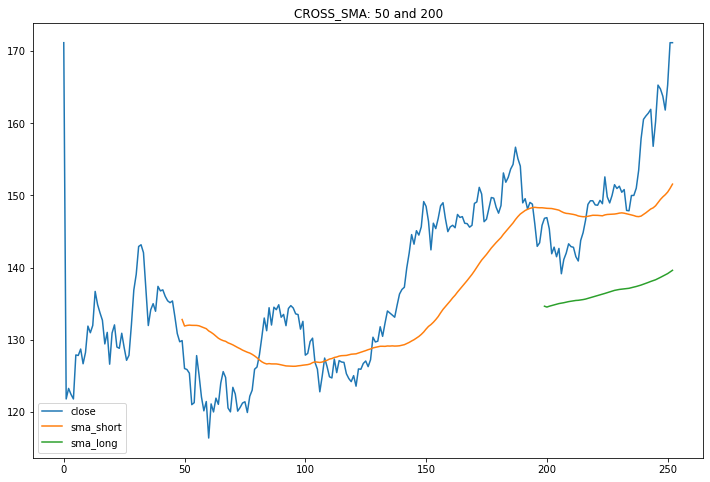

In [10]:
data[['close', 'sma_short', 'sma_long']] \
    .plot(figsize=(12, 8), title=f'CROSS_SMA: {SMA_SHORT} and {SMA_LONG}')

In [12]:
data['position'] = np.where(data['sma_short'] > data['sma_long'], 1, -1)

In [13]:
data['position'].value_counts()

-1    199
 1     54
Name: position, dtype: int64

In [14]:
data.tail(10)

,time,open,high,low,close,volume,sma_short,sma_long,position
243,2021-11-24 04:00:00,161.90,162.30,159.67,161.94,13197224,148.1214,138.07270,1
244,2021-11-26 04:00:00,161.70,161.70,156.00,156.81,20157348,148.2818,138.18110,1
245,2021-11-29 04:00:00,159.00,161.18,157.30,160.24,18556136,148.5654,138.30545,1
246,2021-11-30 04:00:00,160.49,166.53,160.49,165.30,47568438,149.0126,138.46600,1
247,2021-12-01 04:00:00,165.64,170.29,164.20,164.77,30766146,149.4394,138.63565,1
248,2021-12-02 04:00:00,166.56,166.56,157.80,163.76,30425416,149.7976,138.80590,1
249,2021-12-03 04:00:00,163.10,165.35,159.74,161.84,27492621,150.0978,138.96575,1
250,2021-12-06 04:00:00,161.70,167.87,161.70,165.32,26635166,150.4658,139.16235,1
251,2021-12-07 04:00:00,166.30,173.60,165.18,171.18,25282674,150.9820,139.38895,1
252,2021-12-07 04:00:00,166.30,173.60,165.18,171.18,25282674,151.5674,139.61810,1


In [15]:
data.head()

,time,open,high,low,close,volume,sma_short,sma_long,position
0,2021-12-07 04:00:00,166.30,173.60,165.18,171.18,25282674,NaN,NaN,-1
1,2020-12-09 07:00:00,124.50,125.95,121.07,121.78,30229870,NaN,NaN,-1
2,2020-12-10 07:00:00,121.45,123.85,120.01,123.24,21004315,NaN,NaN,-1
3,2020-12-11 07:00:00,123.16,123.70,120.56,122.41,21024768,NaN,NaN,-1
4,2020-12-14 07:00:00,122.81,123.33,121.66,121.78,25192382,NaN,NaN,-1
